# 1. 自建集成算法

In [1]:
# 随机森林、极限森林、GBDT【现成】

## 1.1 导包创建数据

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier # 集成，bagging套袋法
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X,y = datasets.load_wine(return_X_y = True) # 葡萄酒数据
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1024)

## 1.2 KNN和集成算法差距

In [3]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.6222222222222222

In [9]:
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),
                          n_estimators=100,
                          max_samples=1.0,  # max_samples=1.0 浮点数表示百分比；int表示抽int个
                          max_features=1)  # 抽取特征
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.9555555555555556

## 1.3 逻辑斯蒂回归

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('单一逻辑斯蒂算法，得分是：',lr.score(X_test,y_test))

# 偶尔效果会好
bag = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=500,
                        max_samples=1.0, max_features=1.0)
bag.fit(X_train,y_train)
print('逻辑斯蒂集成算法，得分是：', bag.score(X_test,y_test))

单一逻辑斯蒂算法，得分是： 0.9333333333333333
逻辑斯蒂集成算法，得分是： 0.9111111111111111


## 1.4 DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
print('单棵决策树，得分是：',clf.score(X_test,y_test))

# 相当于 随机森林
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,
                        max_samples=1.0,max_features=0.5)
bag.fit(X_train,y_train)
print('决策树集成算法，得分是：',bag.score(X_test,y_test))

单棵决策树，得分是： 0.8444444444444444
决策树集成算法，得分是： 0.9555555555555556


In [13]:
from sklearn.ensemble import RandomForestClassifier

# 超参数调优，过程，一个个，试验
model = RandomForestClassifier(n_estimators=100,max_samples=1.0,max_features=0.5)

model.fit(X_train,y_train)

model.score(X_test,y_test)

0.9555555555555556

# 2. 天池工业蒸汽量预测

#### 普通线性回归

In [14]:
from sklearn.linear_model import LinearRegression,Ridge

In [15]:
import pandas as pd

In [17]:
data = pd.read_csv('./zhengqi_train.txt',sep='\t')
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [18]:
# 训练数据
X_train = data.iloc[:,:-1]
y_train = data['target']

In [20]:
# 预测数据
X_test = pd.read_csv('./zhengqi_test.txt',sep = '\t')
X_test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

y_ = model.predict(X_test)
y_

array([ 0.26825457,  0.2600059 , -0.06905626, ..., -3.53171707,
       -3.48378753, -2.74290238])

In [22]:
np.savetxt('./linear.txt',y_)

#### 决策树

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
X_train.shape

(2888, 38)

In [25]:
model = GradientBoostingRegressor(n_estimators=100,subsample = 0.9,
                                  max_features=0.8)
model.fit(X_train,y_train)

y_ = model.predict(X_test)
np.savetxt('./gbdt.txt',y_)

#### 归一化

In [26]:
from sklearn.preprocessing import StandardScaler

In [30]:
X_train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028


In [40]:
standard = StandardScaler()

standard.fit(X_train)

X_train_norm = standard.transform(X_train)

X_test_norm = standard.transform(X_test)

In [28]:
# 结论：归一化、标准化（目的：不同的属性、特征，尽快同步收敛）
model = LinearRegression()
model.fit(X_train_norm,y_train)

y_ = model.predict(X_test_norm)

np.savetxt('./linear_norm.txt',y_)

In [29]:
model = GradientBoostingRegressor(n_estimators=100,subsample = 0.9,
                                  max_features=0.8)
model.fit(X_train_norm,y_train)

y_ = model.predict(X_test_norm)

np.savetxt('./gbdt_norm.txt',y_)

#### 奇技淫巧

In [37]:
# 目标值【训练数据】进行了标准化
y_train_norm = standard.fit_transform(y_train.values.reshape(-1,1))
y_train_norm = y_train_norm.reshape(-1)
y_train_norm

array([ 0.04944846,  0.55870072,  0.51499244, ..., -0.12335171,
        0.22733098,  0.29543458])

In [38]:
model = LinearRegression()
model.fit(X_train_norm,y_train_norm)

y_ = model.predict(X_test_norm)

np.savetxt('./linear_norm3.txt',y_)

In [39]:
y_

array([ 0.14423907,  0.13585454, -0.1986278 , ..., -3.71832413,
       -3.66960512, -2.91651641])

# 3. GBDT回归树原理

#### 创建数据

In [43]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

### 实际问题，年龄预测，回归问题
# 简单的数据，算法原理，无论简单数据，还是复杂数据，都一样
# 属性一表示花销，属性二表示上网时间
X = np.array([[600,0.8],[800,1.2],[1500,10],[2500,3]])

y = np.array([14,16,24,26]) # 高一、高三，大四，工作两年
# loss  = ls 最小二乘法
learning_rate = 0.1
gbdt = GradientBoostingRegressor(n_estimators=3,loss = 'ls',# 最小二乘法
                                 learning_rate=0.1)#learning_rate 学习率
gbdt.fit(X,y)#训练
y_ = gbdt.predict(X)#预测
y_

array([18.374, 18.916, 21.084, 21.626])

#### 可视化

均方误差： 26.0


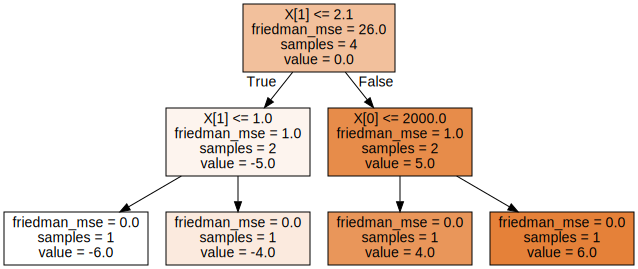

In [44]:
# 第一颗树，分叉时，friedman-mse (就是均方误差)= 26
print('均方误差：',((y - y.mean())**2).mean())
dot_data = tree.export_graphviz(gbdt[0,0],filled=True)
graph = graphviz.Source(dot_data)
graph

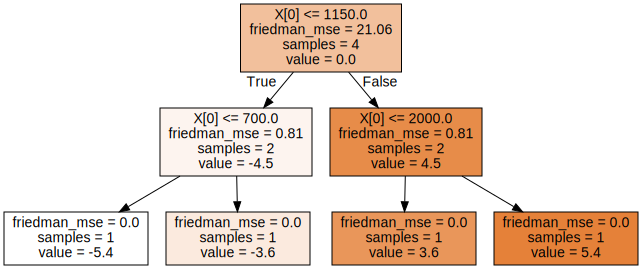

In [45]:
# 第二颗树
dot_data = tree.export_graphviz(gbdt[1,0],filled=True)
graph = graphviz.Source(dot_data)
graph

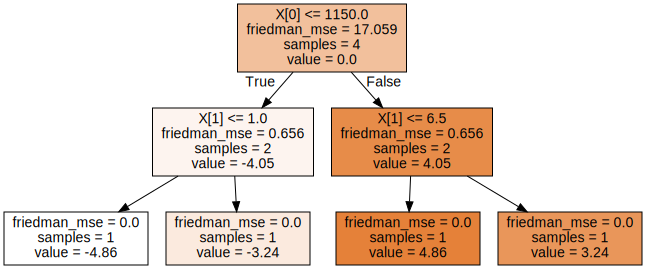

In [46]:
# 第三颗树
dot_data = tree.export_graphviz(gbdt[2,0],filled=True)
graph = graphviz.Source(dot_data)
graph

#### 每棵树结构关系

In [47]:
print(y)

[14 16 24 26]


In [48]:
print(y.mean())

20.0


In [49]:
# 初始第一棵树的残差
# y.mean() 回归树的初始值！！！
residual0 = y - y.mean()
residual0

array([-6., -4.,  4.,  6.])

In [50]:
# 梯度提升树，第二棵树
residual1 = residual0 - learning_rate * residual0
residual1

array([-5.4, -3.6,  3.6,  5.4])

In [51]:
# 梯度提升树，第三棵树
residual2 = residual1 - learning_rate * residual1
residual2

array([-4.86, -3.24,  3.24,  4.86])

In [52]:
# 第三棵树，就是最后一棵树
# 最后一棵树，提升
residual3 = residual2 - residual2 * learning_rate
residual3 # 残差！！！

array([-4.374, -2.916,  2.916,  4.374])

In [53]:
gbdt.predict(X)

array([18.374, 18.916, 21.084, 21.626])

In [54]:
predict = y - residual3
predict

array([18.374, 18.916, 21.084, 21.626])

#### 最佳裂分条件计算

第一棵树裂分

In [55]:
# 计算未分裂均方误差
lower_mse = ((y - y.mean())**2).mean()
print('未分裂均方误差是：',lower_mse)
best_split = {}
for index in range(2): # 特征
    for i in range(3):# 样本数量
        t = X[:,index].copy()
        t.sort()
        split = t[i:i + 2].mean()
        cond = X[:,index] <= split
        mse1 = round(((y[cond] - y[cond].mean())**2).mean(),3)
        mse2 = round(((y[~cond] - y[~cond].mean())**2).mean(),3)
        p1 = cond.sum()/cond.size
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        if mse < lower_mse:
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 26.0
第0列 裂分条件是： 700.0 均方误差是： 0.0 18.667 14.0
第0列 裂分条件是： 1150.0 均方误差是： 1.0 1.0 1.0
第0列 裂分条件是： 2000.0 均方误差是： 18.667 0.0 14.0
第1列 裂分条件是： 1.0 均方误差是： 0.0 18.667 14.0
第1列 裂分条件是： 2.1 均方误差是： 1.0 1.0 1.0
第1列 裂分条件是： 6.5 均方误差是： 27.556 0.0 20.667
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}


第二棵树

In [57]:
residual = y - y.mean()
residual

array([-6., -4.,  4.,  6.])

In [58]:
# 梯度下降，降低残差
residual = residual - learning_rate*residual
# 计算未分裂均方误差
lower_mse = round(((residual - residual.mean())**2).mean(),3)
print('未分裂均方误差是：',lower_mse)
best_split = {}
for index in range(2):
    for i in range(3):
        t = X[:,index].copy()
        t.sort()
        split = t[i:i + 2].mean()
        cond = X[:,index] <= split
        mse1 = round(((residual[cond] - residual[cond].mean())**2).mean(),3)
        mse2 = round(((residual[~cond] - residual[~cond].mean())**2).mean(),3)
        p1 = cond.sum()/cond.size
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        if mse < lower_mse:
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 21.06
第0列 裂分条件是： 700.0 均方误差是： 0.0 15.12 11.34
第0列 裂分条件是： 1150.0 均方误差是： 0.81 0.81 0.81
第0列 裂分条件是： 2000.0 均方误差是： 15.12 0.0 11.34
第1列 裂分条件是： 1.0 均方误差是： 0.0 15.12 11.34
第1列 裂分条件是： 2.1 均方误差是： 0.81 0.81 0.81
第1列 裂分条件是： 6.5 均方误差是： 22.32 0.0 16.74
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}


第三棵树最接裂分计算

In [59]:
# 梯度下降，降低残差
residual = residual - learning_rate*residual
# 计算未分裂均方误差
lower_mse = round(((residual - residual.mean())**2).mean(),3)
print('未分裂均方误差是：',lower_mse)
best_split = {}
for index in range(2):
    for i in range(3):
        t = X[:,index].copy()
        t.sort()
        split = t[i:i + 2].mean()
        cond = X[:,index] <= split
        mse1 = round(((residual[cond] - residual[cond].mean())**2).mean(),3)
        mse2 = round(((residual[~cond] - residual[~cond].mean())**2).mean(),3)
        p1 = cond.sum()/cond.size
        mse = round(mse1 * p1 + mse2 * (1- p1),3)
        print('第%d列' % (index),'裂分条件是：',split,'均方误差是：',mse1,mse2,mse)
        if mse < lower_mse:
            best_split.clear()
            lower_mse = mse
            best_split['第%d列'%(index)] = split
        elif mse == lower_mse:
            best_split['第%d列'%(index)] = split
print('最佳分裂条件是：',best_split)

未分裂均方误差是： 17.059
第0列 裂分条件是： 700.0 均方误差是： 0.0 12.247 9.185
第0列 裂分条件是： 1150.0 均方误差是： 0.656 0.656 0.656
第0列 裂分条件是： 2000.0 均方误差是： 12.247 0.0 9.185
第1列 裂分条件是： 1.0 均方误差是： 0.0 12.247 9.185
第1列 裂分条件是： 2.1 均方误差是： 0.656 0.656 0.656
第1列 裂分条件是： 6.5 均方误差是： 18.079 0.0 13.559
最佳分裂条件是： {'第0列': 1150.0, '第1列': 2.1}
